In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


В первом эксперименте, программа генерировала массив длинны $N$ и запускала сначала параллельную сортировку, затем стандартную, на одинаковых данных. При этом $M$ перебиралась.

Для каждого эксперимента найдем оптимальное время

In [4]:
parallel = pd.read_csv('stats_1.txt', 
                       names=['T', 'N', 'M', 'P'],
                       sep=" ")
parallel['T'] = list(map((lambda x: float(x[:-1])), parallel['T']))
parallel = parallel.loc[parallel.groupby(['P', 'N'])['T'].idxmin()]
parallel.head()

,T,N,M,P
5,0.001478,10000,5001,1
19,0.018963,110000,99001,1
21,0.038284,210000,21001,1
38,0.057797,310000,248001,1
41,0.078932,410000,41001,1


А для стандартной сортировки просто выберем лучший результат.

In [5]:
qsort = pd.read_csv('qstats_1.txt', 
                    names=['T', 'N'],
                    sep=" ")
qsort['T'] = list(map((lambda x: float(x[:-1])), qsort['T']))
qsort = qsort.loc[qsort.groupby(['N'])['T'].idxmin()]
qsort.head()

,T,N
1,0.001369,10000
16,0.018703,110000
925,0.037903,210000
1231,0.057350,310000
948,0.077027,410000


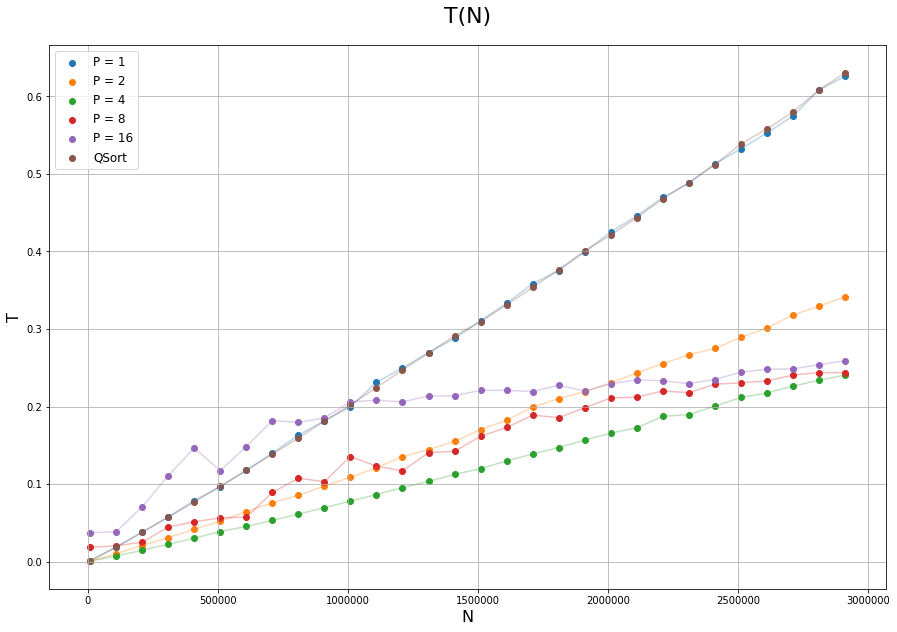

In [11]:
plt.figure(figsize=(15, 10))

for p in [1, 2, 4, 8, 16]:
    plt.plot(parallel[parallel['P'] == p]['N'], np.array(parallel[parallel['P'] == p]['T']), alpha=0.3, label=None)
    plt.scatter(parallel[parallel['P'] == p]['N'], parallel[parallel['P'] == p]['T'], label='P = '+str(p))

plt.plot(qsort['N'], np.array(qsort['T']), alpha=0.3, label=None)
plt.scatter(qsort['N'], qsort['T'], label='QSort')
    
plt.title('T(N)', y=1.03, fontsize=22)
plt.xlabel('N', fontsize=16)
plt.ylabel('T', fontsize=16)

plt.legend(fontsize=12)
plt.grid()
plt.show()

Итого, программа как и ожидалось в однопоточном режиме работает не хуже, потому что ее алгоритм это и есть стандартная сортировка. Когда программа работает в $4$ потока, наблюдается практически трехкратный выгрыш по времени. Дальше время работы уже не просто предсказать, поскольку число потоков превысило число ядер процессора.

Теперь попробуем не перебирать $M$ поскольку это не очень честно, а брать $M = \frac{N}{P}$

In [14]:
parallel = pd.read_csv('stats.txt', 
                       names=['T', 'N', 'M', 'P'],
                       sep=" ")
parallel['T'] = list(map((lambda x: float(x[:-1])), parallel['T']))
parallel = parallel.loc[parallel.groupby(['P', 'N'])['T'].idxmin()]
parallel.head()

,T,N,M,P
0,0.005072,10000,10000,1
1,0.006524,20000,20000,1
2,0.005611,30000,30000,1
3,0.006510,40000,40000,1
4,0.009894,50000,50000,1


А у стандартной сотрировки по-прежнему возьмем лучший результат.

In [15]:
qsort = pd.read_csv('qstats.txt', 
                    names=['T', 'N'],
                    sep=" ")
qsort['T'] = list(map((lambda x: float(x[:-1])), qsort['T']))
qsort = qsort.loc[qsort.groupby(['N'])['T'].idxmin()]
qsort.head()

,T,N
1200,0.001366,10000
901,0.002945,20000
902,0.004597,30000
903,0.006223,40000
1204,0.007912,50000


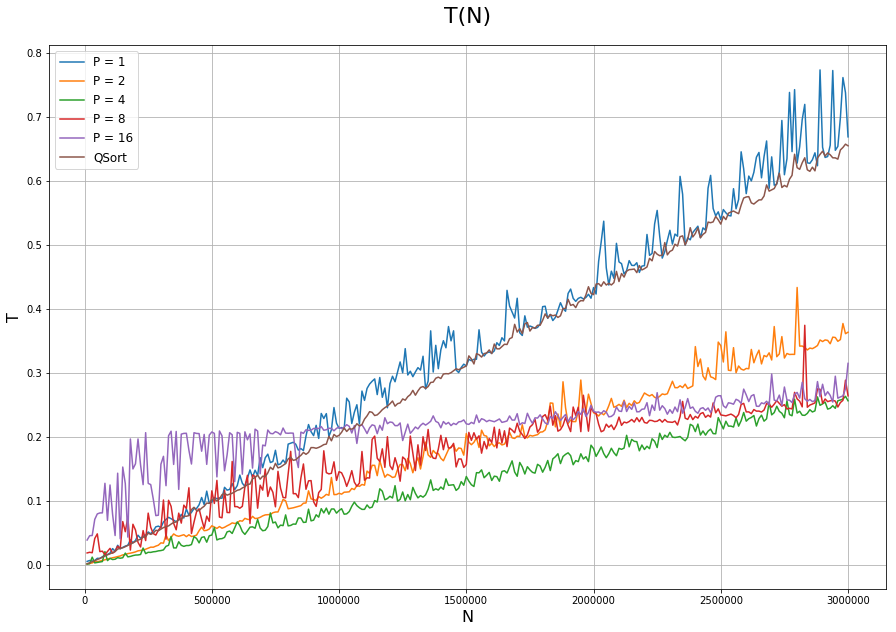

In [25]:
plt.figure(figsize=(15, 10))

for p in [1, 2, 4, 8, 16]:
    plt.plot(parallel[parallel['P'] == p]['N'], np.array(parallel[parallel['P'] == p]['T']), alpha=1, label='P = '+str(p))
#     plt.scatter(parallel[parallel['P'] == p]['N'], parallel[parallel['P'] == p]['T'], lw=0.01, label='P = '+str(p))

plt.plot(qsort['N'], np.array(qsort['T']), alpha=1, label='QSort')
# plt.scatter(qsort['N'], qsort['T'], label='QSort')
    
plt.title('T(N)', y=1.03, fontsize=22)
plt.xlabel('N', fontsize=16)
plt.ylabel('T', fontsize=16)

plt.legend(fontsize=12)
plt.grid()
plt.show()

Результаты такие же, получилось сделать больше измерений, за счет этого графики менее плавные, в добавок мы убрали выбор оптимального $M$ за счет этого скачки процессора имеют большее воздействие на вброс.

In [44]:
import math

p = int(input())
x = int(input())
y = int(input())

a = x * 100 + y
b = (a * (p / 100)) + a
e = a * (1 + p / 100)

print("b =", b, "\t\te =", e)
print("b % 100 =", b % 100, "\t\te % 100 =", e % 100)

b_ = b % 100
e_ = e % 100

print("round(b_) =", round(b_), "\t\tround(e_) =", round(e_))
print("floor(b_) =", math.floor(b_), "\t\tfloor(e_) =", math.floor(e_))

13
179
0
b = 20227.0 		e = 20226.999999999996
b % 100 = 27.0 		e % 100 = 26.999999999996362
round(b_) = 27 		round(e_) = 27
floor(b_) = 27 		floor(e_) = 26
